### Load packages

In [7]:
library(tidyverse)
library(ggthemes)
library(lme4)
library(lmerTest)
library(brms)
library(broom.mixed)
library(tidyboot)

In [8]:
d = read_csv('../results/csv/summary/human_accuracy_by_scenario.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  agent = col_character(),
  scenario = col_character(),
  obs_mean = col_double(),
  boot_mean = col_double(),
  ci_lb = col_double(),
  ci_ub = col_double()
)




In [46]:
d <- d %>% arrange(obs_mean)
d

agent,scenario,obs_mean,boot_mean,ci_lb,ci_ub
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
human,linking,0.6431818,0.6432339,0.6319678,0.6545455
human,clothiness,0.6793939,0.6792020,0.6633308,0.6936389
human,dominoes,0.6909890,0.6909114,0.6826337,0.6990476
human,drop,0.7436559,0.7437218,0.7354104,0.7513262
human,towers,0.7631373,0.7630115,0.7549745,0.7709824
human,containment,0.7669880,0.7668924,0.7580723,0.7750261
human,collision,0.8073333,0.8072727,0.7974796,0.8169630
human,rollingsliding,0.8829861,0.8829481,0.8754115,0.8906962


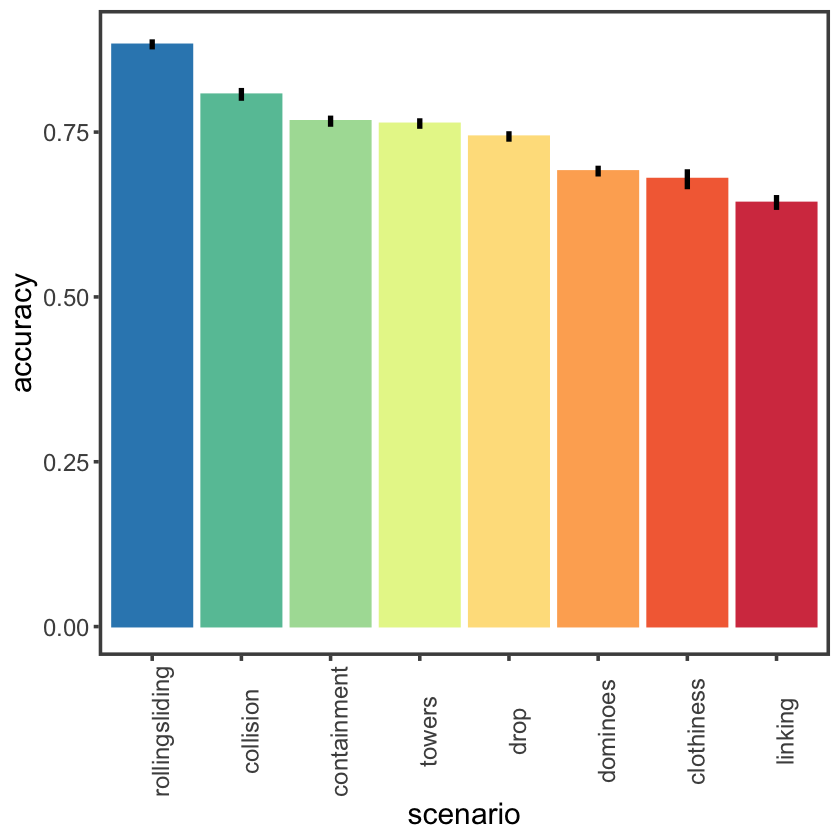

In [51]:
## basic bar plot with error bars for accuracy
d$scenario <- factor(d$scenario,levels = d$scenario)
d %>%
  ggplot(aes(x=reorder(scenario,-obs_mean), y=obs_mean, color=scenario, fill=scenario)) +
  geom_bar(stat='identity') +
  geom_errorbar(aes(ymin=ci_lb, ymax = ci_ub), width = 0, size = 1.5, color='black') + 
    theme_few() +
    xlab('scenario') +
    ylab('accuracy') +
    theme(text = element_text(size=18), 
          element_line(size=1), 
          element_rect(size=2, color="#00000"),
          axis.text.x = element_text(angle=90)) +
    theme(legend.position = "none") +
    scale_fill_brewer(palette="Spectral") + scale_color_brewer(palette="Spectral")

ggsave('../results/plots/human_accuracy_across_scenarios.pdf', width=12, height = 18, units='cm')
